Assignment 1 

In [17]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("train.csv") 

df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop('Cabin', axis=1, inplace=True) 

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])        
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = df[features]
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


C:\Users\suvam\AppData\Local\Temp\ipykernel_20012\3394555750.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\suvam\AppData\Local\Temp\ipykernel_20012\3394555750.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Assignment 2

Feature Coefficients:
GRE Score: 0.0652
TOEFL Score: 0.2076
University Rating: -0.5116
SOP: -0.2605
LOR : 0.8740
CGPA: 1.7034
Research: -0.3452
Accuracy: 0.925


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


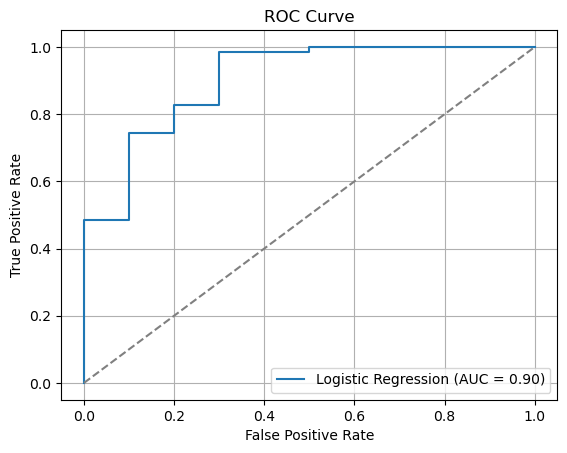

In [18]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("Admission_Predict.csv")  

df['Admit'] = (df['Chance of Admit '] > 0.5).astype(int)

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
x = df[features]
y = df['Admit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

print("Feature Coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

y_prob = model.predict_proba(x_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Assignment 3

In [19]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 5: Split data
x = df.drop('Attrition', axis=1)
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Without Feature Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Without Feature Scaling:
Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
